DABEST and permuco
https://edspace.american.edu/openbehavior/project/dabest-and-permuco/

ACCLAB/DABEST-python
https://github.com/ACCLAB/DABEST-python

DABEST and tutorials
https://acclab.github.io/DABEST-python-docs/index.html

Paper
Moving beyond P values: data analysis with estimation graphics
https://www.nature.com/articles/s41592-019-0470-3


In [15]:
  import numpy as np
  import pandas as pd
  import dabest

  print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v0.3.1


---
# Fig.1D

In [11]:
synch_figures_file = 'Synch_figures.xlsx'
synch_figures =  pd.read_excel(synch_figures_file,
                              sheet_name=0,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )

In [12]:
synch_figures

,males_visible,females_visiblr,males_IR,females_IR,unpaired ttest
0,3.195655,0.770834,-0.465274,2.184694,NaN
1,2.423710,1.596709,1.772781,-0.744146,NaN
2,2.715654,1.921615,2.247868,0.485514,NaN
3,3.158930,0.151802,-0.388171,1.328554,NaN
4,2.069881,0.975387,-0.565355,-0.094647,NaN
5,3.344061,-1.150091,-0.170084,1.726250,NaN
6,0.915141,1.754925,-0.127953,-0.798594,NaN
7,3.081203,0.241169,-0.843152,-0.254499,NaN
8,1.142740,1.903826,0.168659,2.255607,NaN
9,1.784096,-0.528802,-0.604394,0.407547,NaN


In [18]:
  two_groups_unpaired = dabest.load(synch_figures, idx=("males_visible", "females_visiblr","males_IR","females_IR"), resamples=5000)

C:\Users\User\anaconda3\envs\dabest\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


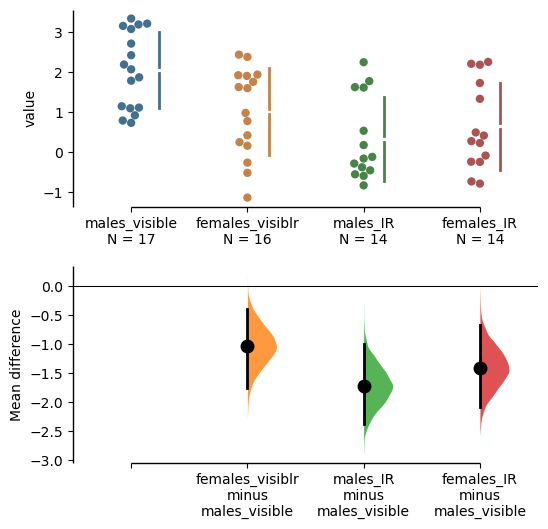

In [19]:
two_groups_unpaired.mean_diff.plot();

---
# Fig.2C

In [24]:
synch_figures_file = 'Synch_figures.xlsx'
synch_figures =  pd.read_excel(synch_figures_file,
                              sheet_name=1,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )

In [25]:
synch_figures

,vehicle_PFC,muscimol_PFC,unpaired ttest
0,-0.059979,-0.982730,NaN
1,3.939691,1.590202,NaN
2,3.493658,2.922574,NaN
3,2.029611,0.949106,NaN
4,0.440945,2.454143,NaN
5,2.899325,2.429283,NaN
6,1.883163,1.490079,NaN
7,4.967946,1.870395,NaN
8,1.505925,2.084176,NaN
9,NaN,2.788442,NaN


In [26]:
  two_groups_unpaired = dabest.load(synch_figures, idx=("vehicle_PFC", "muscimol_PFC"), resamples=5000)

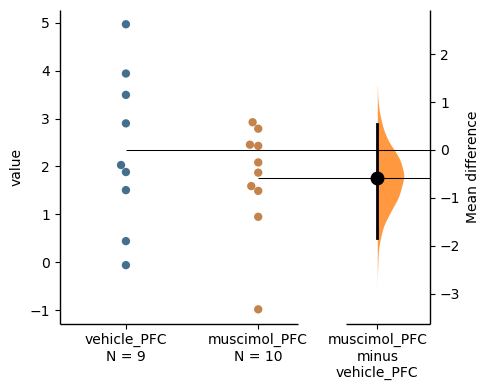

In [27]:
two_groups_unpaired.mean_diff.plot();

---
# Fig.2F

In [30]:
synch_figures_file = 'Synch_figures.xlsx'
synch_figures =  pd.read_excel(synch_figures_file,
                              sheet_name=2,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )

In [31]:
synch_figures

,vehicle_dHPC,muscimol_dHPC,unpaired ttest
0,3.439591,3.595042,NaN
1,1.540554,1.769244,NaN
2,5.386744,4.022865,NaN
3,1.428948,-0.249019,NaN
4,1.900733,1.057256,NaN
5,1.253172,1.434922,NaN
6,0.825874,0.668213,NaN
7,1.832757,NaN,NaN


In [32]:
  two_groups_unpaired = dabest.load(synch_figures, idx=("vehicle_dHPC", "muscimol_dHPC"), resamples=5000)

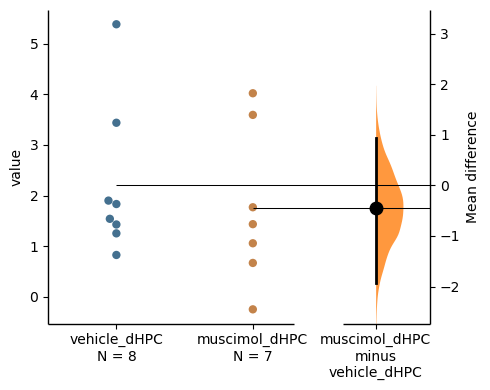

In [33]:
two_groups_unpaired.mean_diff.plot();

---
# Fig.2I

In [36]:
synch_figures_file = 'Synch_figures.xlsx'
synch_figures =  pd.read_excel(synch_figures_file,
                              sheet_name=3,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )

In [37]:
synch_figures

,vehicle_vHPC,muscimol_vHPC,unpaired ttest
0,1.684186,1.007815,NaN
1,1.820251,-0.919060,NaN
2,1.788796,1.137708,NaN
3,1.099301,1.179764,NaN
4,2.607199,0.802585,NaN
5,1.374311,-1.007064,NaN
6,0.178715,0.503479,NaN
7,2.553736,-0.697222,NaN


In [38]:
  two_groups_unpaired = dabest.load(synch_figures, idx=("vehicle_vHPC", "muscimol_vHPC"), resamples=5000)

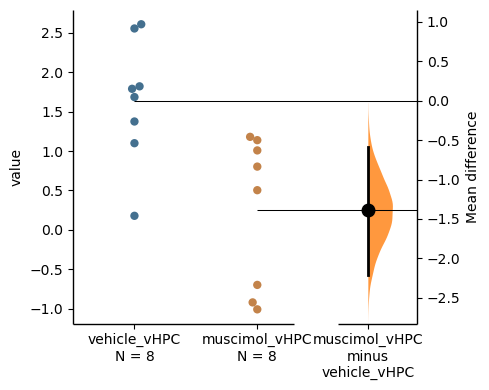

In [39]:
two_groups_unpaired.mean_diff.plot();

---
# Fig.3D upper

In [44]:
synch_figures_file = 'Synch_figures.xlsx'
synch_figures =  pd.read_excel(synch_figures_file,
                              sheet_name=4,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )

In [45]:
synch_figures

,vehicle,CNO,ID,paired ttest
0,2.745036,-0.871509,1,NaN
1,1.873451,0.894894,2,NaN
2,1.900466,0.346963,3,NaN
3,1.506478,0.786214,4,NaN
4,4.663438,2.360864,5,NaN
5,0.613709,3.046542,6,NaN
6,1.501024,0.573216,7,NaN
7,0.842473,-0.533173,8,NaN
8,1.716206,0.120765,9,NaN
9,2.976541,1.467185,10,NaN


In [48]:
  two_groups_unpaired = dabest.load(synch_figures, idx=("vehicle", "CNO"), paired=True,id_col="ID",resamples=5000)

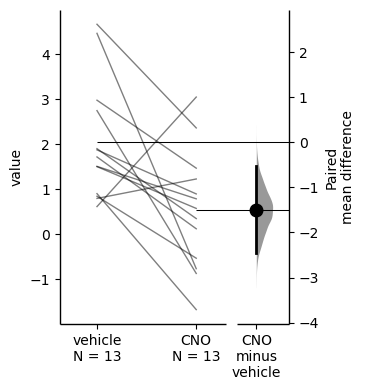

In [49]:
two_groups_unpaired.mean_diff.plot();

---
# Fig.3D lower

In [50]:
synch_figures_file = 'Synch_figures.xlsx'
synch_figures =  pd.read_excel(synch_figures_file,
                              sheet_name=5,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )

In [51]:
synch_figures

,vehicle,CNO,ID,paired ttest
0,1.078762,1.802431,1,NaN
1,2.503823,0.608026,2,NaN
2,0.627062,1.001520,3,NaN
3,1.662656,1.280156,4,NaN
4,2.122308,1.645427,5,NaN
5,1.220100,2.732651,6,NaN
6,2.026069,1.218580,7,NaN
7,1.899240,2.846697,8,NaN
8,1.317482,0.274185,9,NaN
9,3.611523,2.209836,10,NaN


In [52]:
  two_groups_unpaired = dabest.load(synch_figures, idx=("vehicle", "CNO"), paired=True,id_col="ID",resamples=5000)

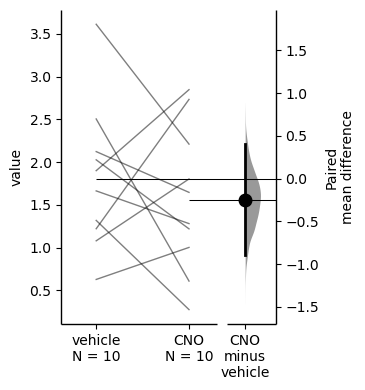

In [53]:
two_groups_unpaired.mean_diff.plot();